In [5]:
import os
import glob
import numpy as np
import pandas as pd

import geopandas as gpd

import rasterio
from rasterio.plot import show

import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [6]:
# lon_min, lon_max, lat_min, lat_max, area = 6.5, 19, 36.5, 48, 'ITALY'
lon_min, lon_max, lat_min, lat_max, area, toll = 6.55, 18.95, 36.5, 47.95, 'ITALY', 0.002

In [7]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','stations','Italy_raingauges')

In [12]:
NE_dir = os.path.join('/','media','arturo','T9','Data','shapes','Natural_Earth','NE_10m_LowReso','NE1_LR_LC_SR_W.tif')
naturalearth = rasterio.open(NE_dir)

In [17]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'DEM','Italy_dem_800.geojson'))   
else:
    raise SystemExit(f"File not found: {veneto_dir}")

# update name of REGIONS geopandas
REGIONS = REGIONS.rename(columns={"reg_name": "Region"})
REGIONS['Region'] = REGIONS['Region'].replace('Emilia Romagna', 'Emilia-Romagna')

In [ ]:
dir_input = os.path.join(dir_base, 'QC_MIX', 'METADATA', 'METADATA_INTENSE_UPDATE.csv')
METADATA = pd.read_csv(dir_input)
METADATA.head(3)

,File,ISO,Region,Code,Name,Elevatn,Or_EPSG,CRS_E,CRS_N,Lat,...,INTENSE,AGENCY,Source,TimeZon,Elevation,Orig_EPSG,Year_Start,Year_End,INTENSE_Resp,TimeZone
0,IT-322_AA_6535_0060_QCv1.csv,IT-322,Alto-Adige,AA_6535,VANDOIESDISOPRA,746.0,32632.0,710057.0,5187849.0,46.811055,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN
1,IT-322_AA_5650_0060_QCv1.csv,IT-322,Alto-Adige,AA_5650,SELVADEIMOLINI,1141.0,32632.0,718972.0,5196967.0,46.890136,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN
2,IT-322_AA_5690_0060_QCv1.csv,IT-322,Alto-Adige,AA_5690,MOLINIDITURES,851.0,32632.0,724491.0,5198298.0,46.900257,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN


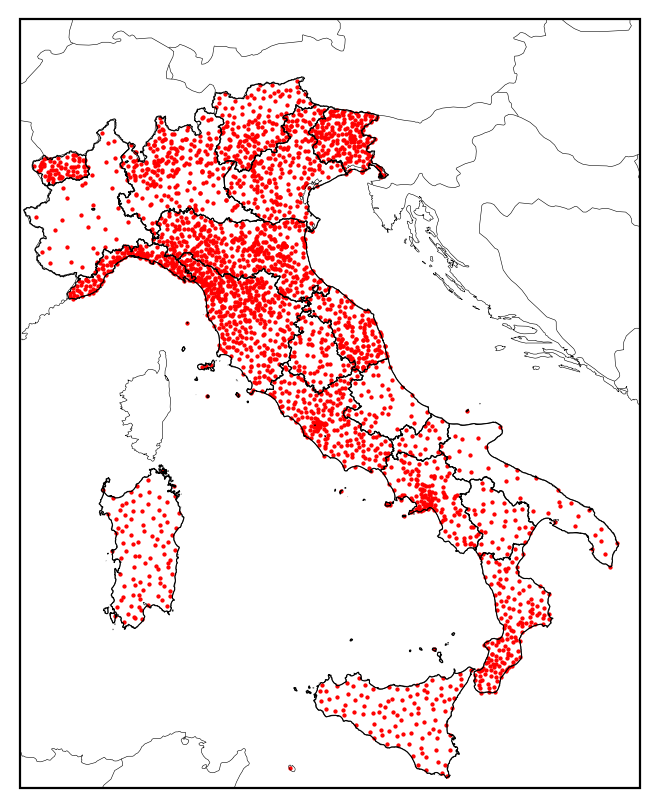

In [ ]:
linewidth_map = 0.2

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,5),dpi=200)
gs = gridspec.GridSpec(1,1)

# ===========================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.set_aspect('auto')
ax1.coastlines(linestyle='-',linewidth=linewidth_map,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS.with_scale('50m'),linewidth=linewidth_map,edgecolor='k',zorder=10)

REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.4, zorder=10)

ax1.scatter(METADATA['Lon'], METADATA['Lat'], c='r', s=0.3, label='Rain gauges')

# gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = True
# gl.left_labels = True
# gl.right_labels = False
# gl.xlabel_style = {'size': 6, 'color': 'k'}
# gl.ylabel_style = {'size': 6, 'color': 'k'}

# plt.legend(loc='upper right', fontsize=7, markerscale=5, frameon=True)

# ax1.set_title(f'Rain gauges in Italy: {len(METADATA)}', fontsize=8, loc='left', pad=2)

# ===========================================================================================================================================
# salida = os.path.join('/','home','arturo','Downloads','figure2.png')
# print(f'Export figure to: {salida}')
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

Export figure to: ../figures/Article_down/figure2.png


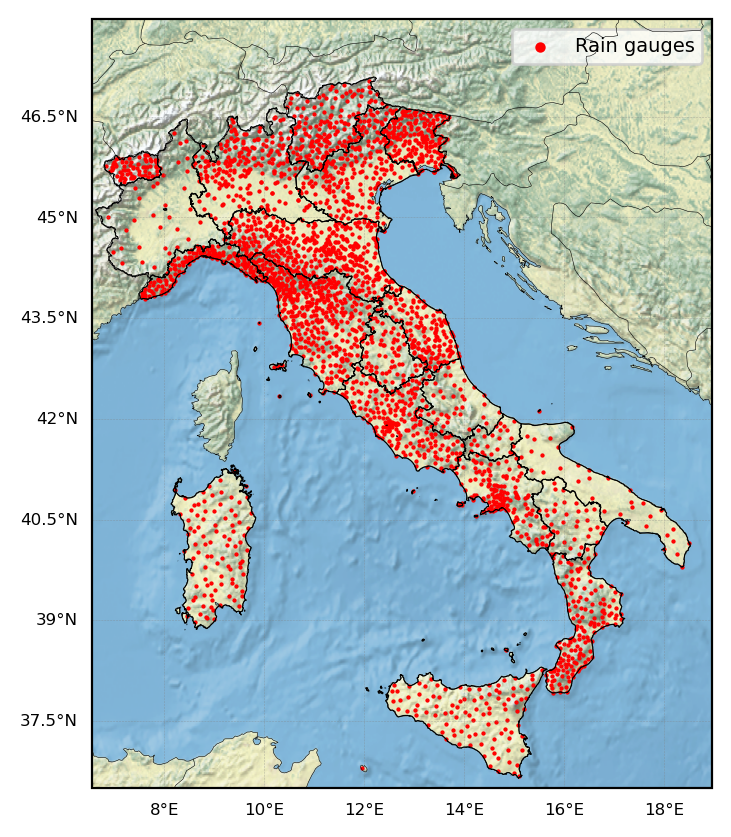

In [ ]:
linewidth_map = 0.2

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,5),dpi=200)
gs = gridspec.GridSpec(1,1)

# ===========================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.set_aspect('auto')
ax1.coastlines(linestyle='-',linewidth=linewidth_map,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS.with_scale('50m'),linewidth=linewidth_map,edgecolor='k',zorder=10)

show(naturalearth, ax=ax1)

REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.4, zorder=10)

ax1.scatter(METADATA['Lon'], METADATA['Lat'], c='r', s=0.3, label='Rain gauges')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

plt.legend(loc='upper right', fontsize=7, markerscale=5, frameon=True)

# ===========================================================================================================================================
salida = os.path.join('..','figures','Article_down','figure2.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

## Rainguges and Elevation

In [10]:
Station_dir = '/media/arturo/T9/Data/Italy/stations/Italy_raingauges/QC_MIX/METADATA/METADATA_INTENSE_UPDATE.csv'
Station = pd.read_csv(Station_dir)

Station.head(3)

,File,ISO,Region,Code,Name,Elevation,Or_EPSG,CRS_E,CRS_N,Lat,...,Source,TimeZon,Elevation.1,Orig_EPSG,Year_Start,Year_End,INTENSE_Resp,TimeZone,elevation_DEM,Elevation_update
0,IT-322_AA_6535_0060_QCv1.csv,IT-322,Alto-Adige,AA_6535,VANDOIESDISOPRA,746.0,32632.0,710057.0,5187849.0,46.811055,...,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN,745.9,746.0
1,IT-322_AA_5650_0060_QCv1.csv,IT-322,Alto-Adige,AA_5650,SELVADEIMOLINI,1141.0,32632.0,718972.0,5196967.0,46.890136,...,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN,1140.0,1141.0
2,IT-322_AA_5690_0060_QCv1.csv,IT-322,Alto-Adige,AA_5690,MOLINIDITURES,851.0,32632.0,724491.0,5198298.0,46.900257,...,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN,849.9,851.0


In [27]:
Elevation = Station.Elevation_update.values
Station_lat = Station.Lat.values
Station_lon = Station.Lon.values

Station_lat = Station_lat[~np.isnan(Elevation)]
Station_lon = Station_lon[~np.isnan(Elevation)]
Elevation = Elevation[~np.isnan(Elevation)]

Elevation_norm = (Elevation - np.min(Elevation)) / (np.max(Elevation) - np.min(Elevation))

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Export figure to: ../figures/Article_down/figure2.png


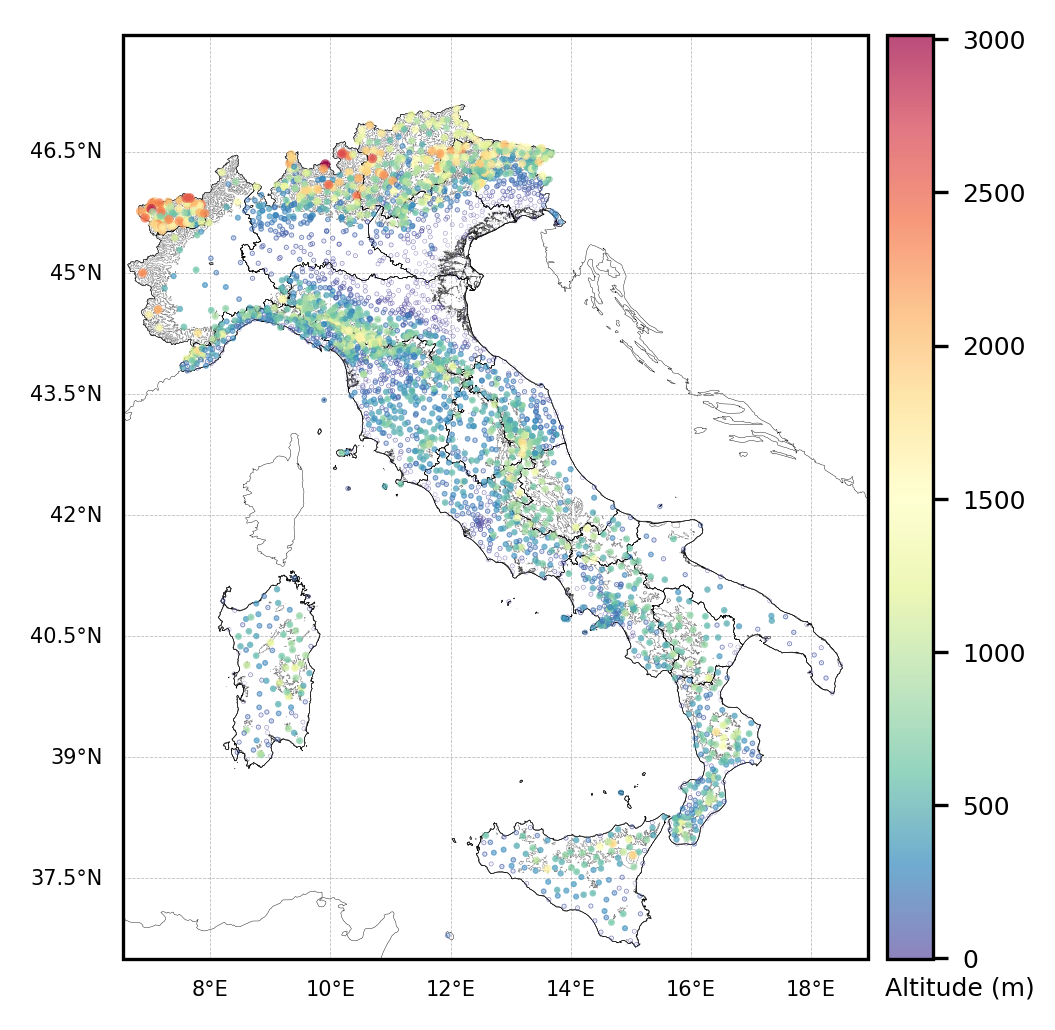

In [81]:
elev_cmap = plt.cm.Spectral_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ===========================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1,color='k')
REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.1, zorder=10)
DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=2, alpha=0.5)

REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.scatter(Station_lon, Station_lat, c=Elevation, s=Elevation_norm*2, alpha=0.7, label='Rain gauges', cmap=elev_cmap, norm=None, zorder=20)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

cbar = plt.colorbar(a1, ax=ax1, fraction=0.05, pad=0.02)
cbar.ax.tick_params(labelsize=6) 
label = cbar.ax.set_xlabel("Altitude (m)", fontsize=6, labelpad=4)
label.set_horizontalalignment("right")  # Alinea a la derecha
label.set_x(3.2) 

# ===========================================================================================================================================
salida = os.path.join('..','figures','Article_down','figure2.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)